

# Connect with Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import interp1d
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn import preprocessing
from sklearn.preprocessing import normalize

# Loading Data

In [ ]:
path = "drive/MyDrive/Colab Notebooks/CogAge/Datasets/testing/"
test_acc = np.load(path+"testAccelerometer.npy")
test_grav = np.load(path+"testGravity.npy")
test_gyro = np.load(path+"testGyroscope.npy")
test_jinsAcc = np.load(path+"testJinsAccelerometer.npy")
test_jinsGyro = np.load(path+"testJinsGyroscope.npy")
test_Label =np.load(path+"testLabels.npy") 
test_linAcc = np.load(path+"testLinearAcceleration.npy")
test_MsAcc = np.load(path+"testMSAccelerometer.npy")
test_MsGyro = np.load(path + "testMSGyroscope.npy")
test_MsMag = np.load(path+"testMagnetometer.npy")
# test_acc

path = "drive/MyDrive/Colab Notebooks/CogAge/Datasets/training/"
train_acc = np.load(path+"trainAccelerometer.npy")
train_grav = np.load(path+"trainGravity.npy")
train_gyro = np.load(path+"trainGyroscope.npy")
train_jinsAcc = np.load(path+"trainJinsAccelerometer.npy")
train_jinsGyro = np.load(path+"trainJinsGyroscope.npy")
train_Label =np.load(path+"trainLabels.npy") 
train_linAcc = np.load(path+"trainLinearAcceleration.npy")
train_MsAcc = np.load(path+"trainMSAccelerometer.npy")
train_MsGyro = np.load(path + "trainMSGyroscope.npy")
train_MsMag = np.load(path+"trainMagnetometer.npy")
train_Label

array([47, 47, 22, ..., 33, 29, 28])

In [ ]:
np.shape(train_acc) # shape=(2284, 800, 3)
# np.shape(train_gyro) #shape=(2284, 800, 3)
# np.shape(train_grav) #shape=(2284, 800, 3)
# np.shape(train_jinsAcc) #shape=(2284, 80, 3) 
# np.shape(train_jinsGyro) #shape=(2284, 80, 3)
# np.shape(train_Label) #shape=(2284)
# np.shape(train_linAcc) #shape=(2284, 800, 3)
# np.shape(train_MsAcc) #shape=(2284, 268, 3)
# np.shape(train_MsGyro) #shape=(2284, 268, 3)
# np.shape(train_MsMag) #shape=(2284, 200, 3)

np.shape(test_MsAcc)

(2288, 268, 3)

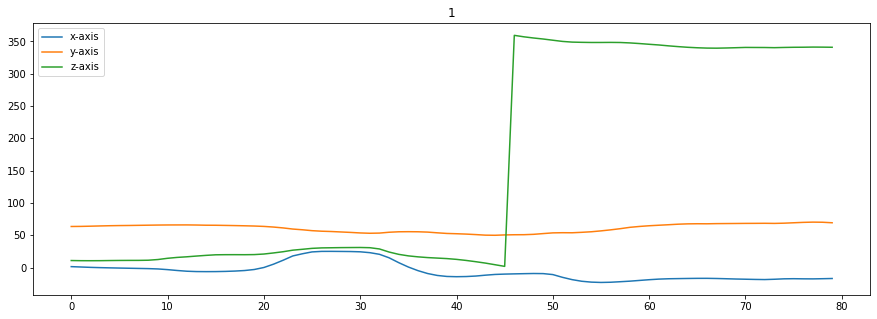

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
axs.plot(train_jinsGyro[100][:])
plt.legend(['x-axis', 'y-axis', 'z-axis'], loc="upper left")
plt.title(train_Label[100])
# axs[1].plot(train_MsAcc[0][:])
# plt.legend(['x-axis', 'y-axis', 'z-axis'], loc="upper left")
# axs[2].plot(train_jinsAcc[0][:])
# plt.legend(['x-axis', 'y-axis', 'z-axis'], loc="upper left")
plt.show()

#Normalizing Data

In [ ]:
def Normalize(X):
  norm = []
  for I in range(len(X)):
    norm.append(normalize(X[I]))
  norm=np.array(norm)
  return norm

In [ ]:
train_acc = Normalize(train_acc)
train_gyro = Normalize(train_gyro)
train_grav = Normalize(train_grav)
train_linAcc = Normalize(train_linAcc)
train_MsMag = Normalize(train_MsMag)
train_MsAcc = Normalize(train_MsAcc)
train_MsGyro = Normalize(train_MsGyro)
train_jinsAcc = Normalize(train_jinsAcc)
train_jinsGyro = Normalize(train_jinsGyro)

In [ ]:
test_acc = Normalize(test_acc)
test_gyro = Normalize(test_gyro)
test_grav = Normalize(test_grav)
test_linAcc = Normalize(test_linAcc)
test_MsMag = Normalize(test_MsMag)
test_MsAcc = Normalize(test_MsAcc)
test_MsGyro = Normalize(test_MsGyro)
test_jinsAcc = Normalize(test_jinsAcc)
test_jinsGyro = Normalize(test_jinsGyro)

# Visualizing Data

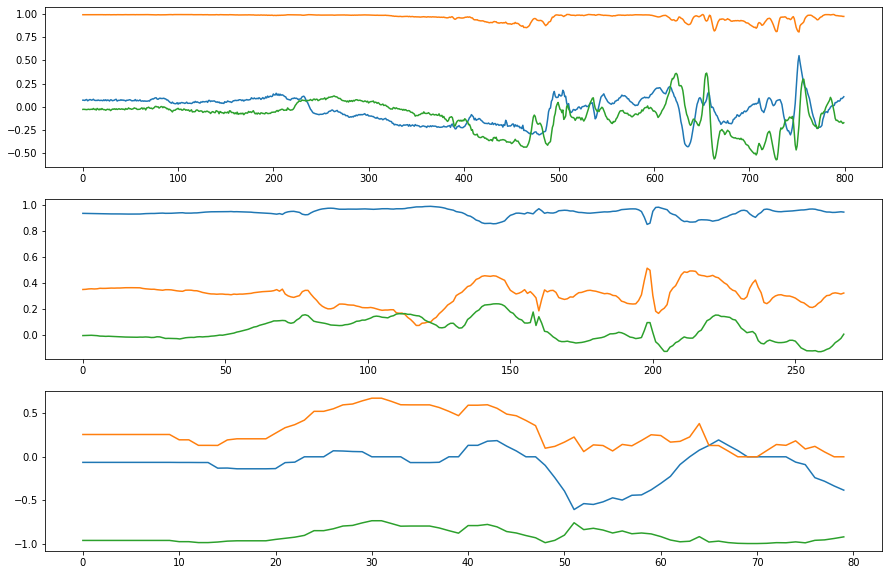

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10))
axs[0].plot(train_acc[0][:])
axs[1].plot(train_MsAcc[0][:])
axs[2].plot(train_jinsAcc[0][:])
plt.show()

# Extracting Features

In [ ]:
from scipy import signal
def Denoise(data):     #Also used weiner for denoising
    denoised_data = np.copy(data)
    for i in range(data.shape[0]):
        for j in range(data.shape[2]):
            denoised_data[i,:,j] = signal.medfilt(data[i,:,j], kernel_size=3)
    return denoised_data

In [ ]:
train_acc = Denoise(train_acc)
train_gyro = Denoise(train_gyro)
train_grav = Denoise(train_grav)
train_linAcc = Denoise(train_linAcc)
train_MsMag = Denoise(train_MsMag)
train_MsAcc = Denoise(train_MsAcc)
train_MsGyro = Denoise(train_MsGyro)
train_jinsAcc = Denoise(train_jinsAcc)
train_jinsGyro = Denoise(train_jinsGyro)

In [ ]:
test_acc = Denoise(test_acc)
test_gyro = Denoise(test_gyro)
test_grav = Denoise(test_grav)
test_linAcc = Denoise(test_linAcc)
test_MsMag = Denoise(test_MsMag)
test_MsAcc = Denoise(test_MsAcc)
test_MsGyro = Denoise(test_MsGyro)
test_jinsAcc = Denoise(test_jinsAcc)
test_jinsGyro = Denoise(test_jinsGyro)

# 66.87% after denoising

In [ ]:
def extract_features(data):
    # max
    def Fmax(dataX):
        return np.max(dataX, axis=0)
    
    # min
    def Fmin(dataX):
        return np.min(dataX, axis=0)

    # average
    def Faverage(dataX):
        return np.average(dataX, axis=0)
    
    # mean
    def Fmean(dataX):
        return np.mean(dataX, axis=0)
    
    # first order mean
    def Ffirst_order_mean(dataX):
      x = dataX[:,0]
      y = dataX[:,1]
      z = dataX[:,2]
      firstOrderX = np.diff(x, 1)
      firstOrderY = np.diff(y, 1)
      firstOrderZ = np.diff(z, 1)
      return [firstOrderX.mean(), firstOrderY.mean(), firstOrderZ.mean()]

    def Ffirst_order_mean_norm(dataX):
      meanNormFirstOrder = np.zeros(dataX.shape[1])
      for i in range(dataX.shape[1]):
        d = dataX[:, i]
        FirstOrDiff = np.diff(d,1)
        meanFirstOrder = FirstOrDiff.mean()                           #15
        if min(FirstOrDiff) != max(FirstOrDiff):
          normalizedMSO = (FirstOrDiff-min(FirstOrDiff))/(max(FirstOrDiff)- min(FirstOrDiff))
          meanNormFirstOrder[i] = normalizedMSO.mean()                  #16
        elif max(FirstOrDiff) != 0:
          normalizedMSO = FirstOrDiff/max(FirstOrDiff)
          meanNormFirstOrder[i] = normalizedMSO.mean()                  #16
      
      return meanNormFirstOrder

    # second order mean
    def Fsecond_order_mean(dataX):
      x = dataX[:,0]
      y = dataX[:,1]
      z = dataX[:,2]
      secondOrderX = np.diff(x, 2)
      secondOrderY = np.diff(y, 2)
      secondOrderZ = np.diff(z, 2)
      return [secondOrderX.mean(), secondOrderY.mean(), secondOrderZ.mean()]

    # norm of second order mean
    def Fsecond_order_mean_norm(dataX):
      meanNormSecondOrder = np.zeros(dataX.shape[1])
      for i in range(dataX.shape[1]):
        d = dataX[:, i]
        secondOrDiff = np.diff(d,2)
        meanSecondOrder = secondOrDiff.mean()                           #15
        if min(secondOrDiff) != max(secondOrDiff):
          normalizedMSO = (secondOrDiff-min(secondOrDiff))/(max(secondOrDiff)- min(secondOrDiff))
          meanNormSecondOrder[i] = normalizedMSO.mean()                  #16
        elif max(secondOrDiff) != 0:
          normalizedMSO = secondOrDiff/max(secondOrDiff)
          meanNormSecondOrder[i] = normalizedMSO.mean()                  #16
      
      return meanNormSecondOrder
    
    # variance
    def Fvariance(dataX):
        return np.var(dataX, axis=0)

    # standard deviation
    def Fstandard_deviation(dataX):
        return np.std(dataX, axis=0)

    # skewness
    def Fskewness(dataX):
      out = []
      for i in range(dataX.shape[1]):
        d = dataX[:,i]
        out.append(skew(d))
      
      return out

    # kurtosis
    def FkurtosisD(dataX):
        out = []
        for i in range(dataX.shape[1]):
          d = dataX[:,i]
          out.append(kurtosis(d))
        
        return out

    
    # percentile 20
    def Fpercentile20(dataX):
        return np.percentile(dataX, 20, axis=0)

    # percentile 50
    def Fpercentile50(dataX):
        return np.percentile(dataX, 50, axis=0)

    # percentile 80
    def Fpercentile80(dataX):
        return np.percentile(dataX, 80, axis=0)

    # zero crossing
    def Fzero_crossing_rate(signal):
      crossings = np.where(np.diff(np.sign(signal)))[0]
      rate = len(crossings) / len(signal)
      return rate

    def getZeroCrossings(mean, data):
      sign = [1,0] ;
      direction = 0
      countZC = 0;
      if data[0] >= mean:
          direction = 1

      for i in range(len(data)):
          if (data[i] >= mean and direction == 0) or (data[i] < mean and direction == 1):
              direction = sign[direction]
              countZC = countZC+1
      return countZC

    def Fzero_crossing_point(data):
      zero_crossing = []
      for i in range(data.shape[1]):
        d = data[:, i]
        m = np.mean(d)
        zero_crossing.append(getZeroCrossings(m,d))
      
      return zero_crossing  

    # inter quartile
    def Finterquartile_range(data):
      q1, q3 = np.percentile(data, [25, 75])
      iqr = q3 - q1
      return [iqr]
    
    def Fspectral_energy(d):
      spectralEnergy = []
      
      for j in range(d.shape[-1]):
        da = d[:,j]
        f = np.fft.fft(da)  #discrete fourier
        F = abs(f)
        spectralEnergy.append(sum(np.square(F))) #spectral energy               

      return spectralEnergy

    def Fspectral_entropy(d):
      spectralEntropy = []
      for j in range(d.shape[1]):
        da = d[:,j]
        f = np.fft.fft(da)  #discrete fourier
        F = abs(f)
        sumF = sum(F)
        if sumF == 0:
          sumF = 1
        nF = F/sumF
        min_nF = 1
        if (min(nF) != max(nF)) and (min(nF) != 0):  #if nF contains only zeros then min() at the next line returns empty set, So i used this condition to avoid empty set error.
          min_nF = min(m for m in nF if m > 0)

        logF = np.log((nF+min_nF))
        spectralEntropy.append(-1*sum(nF*logF)) #spectral entropy               
      
      return spectralEntropy

    features = []
    features.extend(Fmax(data))
    features.extend(Fmin(data))
    features.extend(Fmean(data))
    features.extend(Ffirst_order_mean(data))
    features.extend(Fsecond_order_mean(data))
    features.extend(Faverage(data))
    features.extend(Fvariance(data))
    features.extend(Fstandard_deviation(data))
    features.extend(Fpercentile20(data))
    features.extend(Fpercentile50(data))
    features.extend(Fpercentile80(data))
    features.extend(FkurtosisD(data))
    features.extend(Fskewness(data))
    features.extend(Fzero_crossing_point(data))
    features.extend(Finterquartile_range(data))
    features.extend(Fspectral_energy(data))
    features.extend(Fspectral_entropy(data))
    
    return features

In [ ]:
def calculateFeature(X):
    features=[]
    for i in range(X.shape[0]):
      inpF = extract_features(X[i])
      features.append(inpF)
    return features

In [ ]:
def concate_feature_array(trAcc, trGyro, trGrav, trLin, trMsM, trMsA, trMsG, trJiAc,trJiG):
  d1 = calculateFeature(trAcc)
  print("Accelerometer Features extracted")
  d2 = calculateFeature(trGyro)
  print("Gyroscope Features extracted")
  d3 = calculateFeature(trGrav)
  print("Gravity Features extracted")
  d4 = calculateFeature(trLin)
  print("Linear Acceleration Features extracted")
  d5 = calculateFeature(trMsM)
  print("MsM Features extracted")
  d6 = calculateFeature(trMsA)
  print("Ms Acc. Features extracted")
  d7 = calculateFeature(trMsG)
  print("Ms Gyro. Features extracted")
  d8 = calculateFeature(trJiAc)
  print("Jins Acc. Features extracted")
  d9 = calculateFeature(trJiG)
  print("Jins Gyro. Features extracted")

  feature_array = np.concatenate((d1,d2,d3,d4,d5,d6,d7,d8,d9), axis=1)
  return feature_array

In [ ]:
train_features_reshaped = concate_feature_array(train_acc, train_gyro, train_grav
                                                ,train_linAcc, train_MsMag, train_MsAcc,
                                                train_MsGyro, train_jinsAcc, train_jinsGyro);

print("Training Features Calculated")
print(np.shape(train_features_reshaped))


Accelerometer Features extracted
Gyroscope Features extracted
Gravity Features extracted
Linear Acceleration Features extracted
MsM Features extracted
Ms Acc. Features extracted
Ms Gyro. Features extracted
Jins Acc. Features extracted
Jins Gyro. Features extracted
Training Features Calculated
(2284, 441)


In [ ]:
test_features_reshaped = concate_feature_array(test_acc, test_gyro, test_grav,
                                               test_linAcc, test_MsMag, test_MsAcc,
                                               test_MsGyro, test_jinsAcc, test_jinsGyro)

print("Testing features Calculated....")
print(np.shape(test_features_reshaped))

Accelerometer Features extracted
Gyroscope Features extracted
Gravity Features extracted
Linear Acceleration Features extracted
MsM Features extracted
Ms Acc. Features extracted
Ms Gyro. Features extracted
Jins Acc. Features extracted
Jins Gyro. Features extracted
Testing features Calculated....
(2288, 441)


In [ ]:
# train_features_reshaped.astype(np.float64)
test_features_reshaped.astype(np.float64)
print(np.isnan(train_features_reshaped).any())
np.info(train_features_reshaped)

False
class:  ndarray
shape:  (2284, 441)
strides:  (3528, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0xe847750
byteorder:  little
byteswap:  False
type: float64


# Combine train + test

In [ ]:
all_features = []
all_features.extend(train_features_reshaped)
all_features.extend(test_features_reshaped)

all_labels = []
all_labels.extend(train_Label)
all_labels.extend(test_Label)

print(np.shape(all_features))
print(np.shape(all_labels))

(4572, 441)
(4572,)


# Import Classifier libraries

In [ ]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# ACCURACY

# Cross Validation

## For **K4 (1-3, test-train)**
 accurcay achieved are respectively: 
 1 test, (2,3,4) train = 75.07 % || 
 2 test, (1,3,4) train = 77.08 % ||
 3 test, (1,2,4) train = 81.45 % ||
 4 test, (1,2,3) train = 79.79 % 

 ### Aveage Accuracy = 78.35%

In [ ]:
K = 4

In [ ]:
avg_accuracy = 0

for i in range(K):
  all_train_features = []
  all_test_features = []
  all_train_labels = []
  all_test_labels = []
  slices = 0
  for j in range(K):
    if j == i:
      all_test_features.extend(all_features[slices:slices+np.shape(all_features)[0]//K])
      all_test_labels.extend(all_labels[slices:slices+np.shape(all_labels)[0]//K])
    else:
      all_train_features.extend(all_features[slices: slices+np.shape(all_features)[0]//K])
      all_train_labels.extend(all_labels[slices:slices+np.shape(all_labels)[0]//K])
    
    slices += (np.shape(all_features)[0] // K)

  

  #classfier = SVC(kernel='linear', C=1)  # non-linear kernel is proposed by the fernando's paper
  classfier = RandomForestClassifier(max_depth=20, random_state=440) 
  #RS = 0, Acc = 67.88% 
  #RS = 1, Acc = 68.40%
  #RS = 40, max_depth=25, Acc = 68.84%
  #RS = 125,max_depth=30, Acc = 68.71%
  #RS = 440, Acc = 69.14%

  classfier.fit(all_train_features,all_train_labels)
  estimatedLabels = classfier.predict(all_test_features)

  accuracy = accuracy_score(all_test_labels,estimatedLabels)
  weightedF1 = f1_score(all_test_labels,estimatedLabels,average='weighted')
  averageF1 = f1_score(all_test_labels,estimatedLabels,average='macro')
  allF1Scores = f1_score(all_test_labels,estimatedLabels,average=None)
  conf_matrix = confusion_matrix(all_test_labels,estimatedLabels)

  # Print results
  print('   C = 1.0 ')
  print('   Average F1-score = %.4f' % (averageF1))
  print('   Test accuracy = %.2f %%' % (accuracy*100))
  print('   Weighted F1-score = %.4f' % (weightedF1))
  avg_accuracy += (accuracy*100)
  # print('   All F1-scores:')
  # print(allF1Scores)
  # print('   Confusion Matrix:')
  # print(conf_matrix)

  print('-------------------------------------------------------')


print('\n-------------------------------------------------------')
print("AVERAGE ACCURACY : %.2f  " % (avg_accuracy/K))
print('-------------------------------------------------------')

   C = 1.0 
   Average F1-score = 0.7544
   Test accuracy = 75.07 %
   Weighted F1-score = 0.7474
-------------------------------------------------------
   C = 1.0 
   Average F1-score = 0.7660
   Test accuracy = 77.08 %
   Weighted F1-score = 0.7693
-------------------------------------------------------
   C = 1.0 
   Average F1-score = 0.8173
   Test accuracy = 81.45 %
   Weighted F1-score = 0.8135
-------------------------------------------------------
   C = 1.0 
   Average F1-score = 0.7922
   Test accuracy = 79.79 %
   Weighted F1-score = 0.7971
-------------------------------------------------------

-------------------------------------------------------
AVERAGE ACCURACY : 78.35  
-------------------------------------------------------


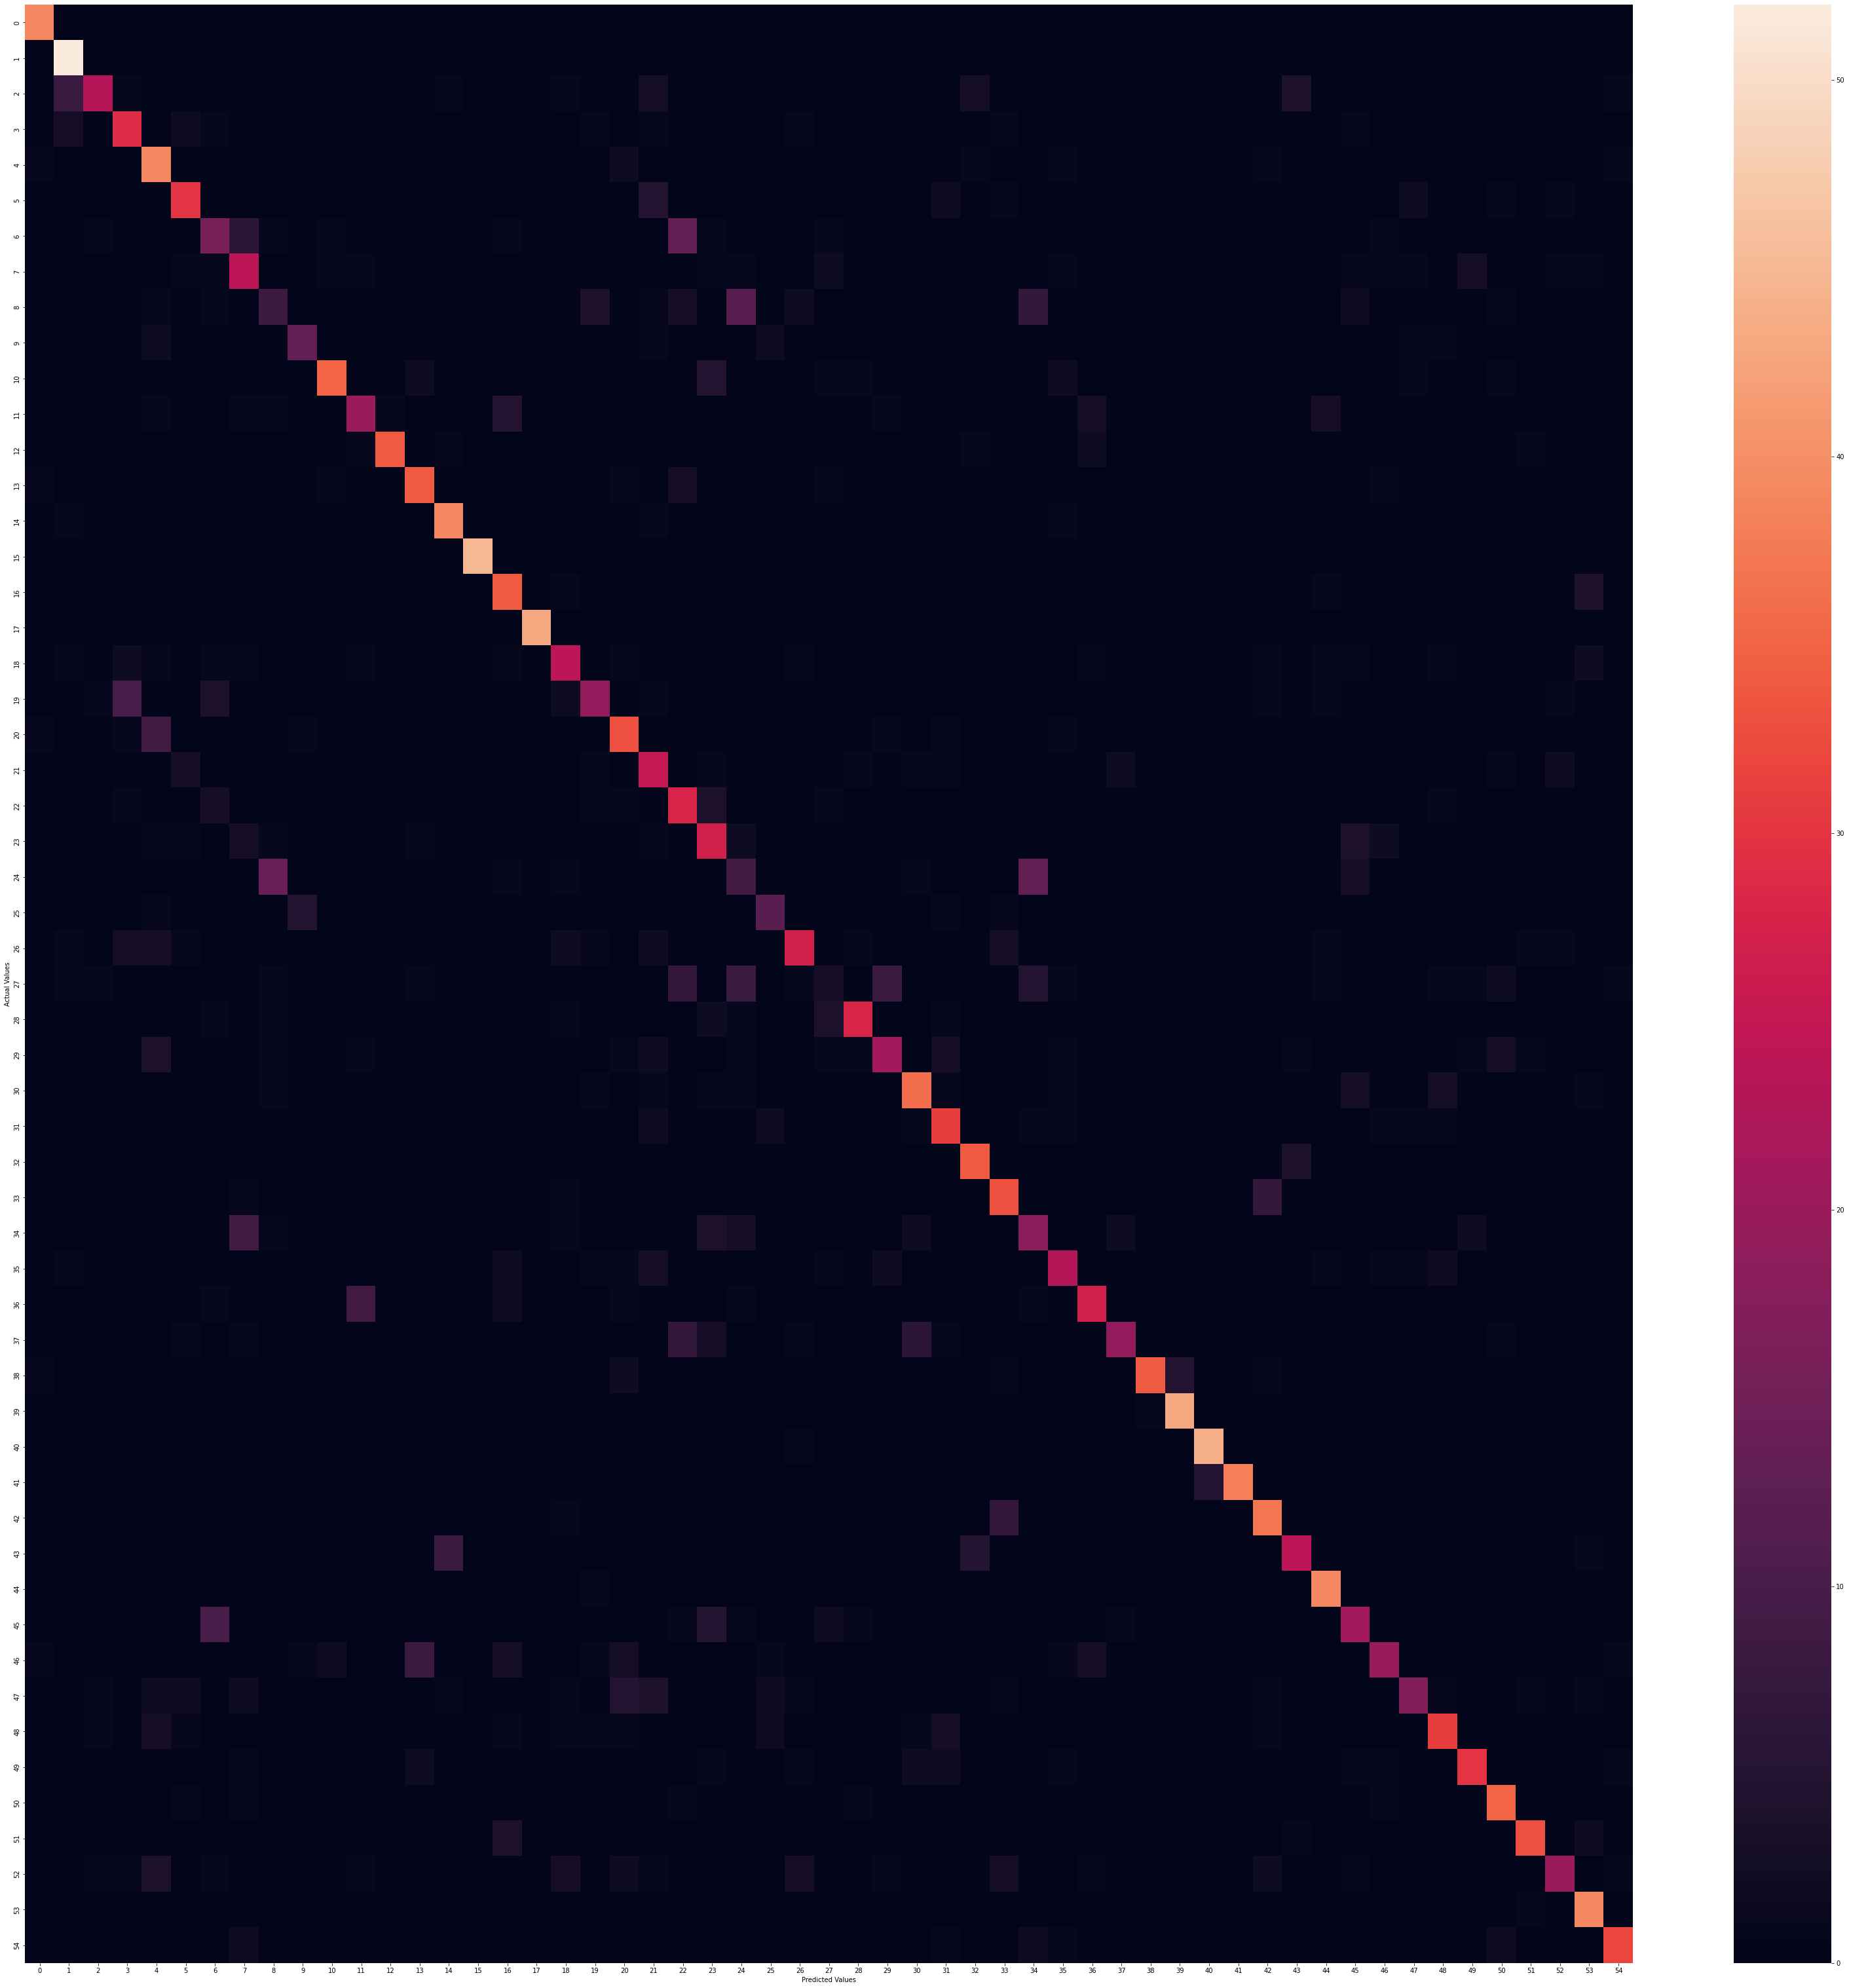

In [ ]:
import seaborn as sns
plt.figure(figsize=(55,55))
sns.heatmap(conf_matrix)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Temp Work